# Generate a simple training + validation dataset

In [45]:
# imports
import numpy as np

from pkg_resources import resource_filename

from matplotlib import pyplot as plt

## Init

In [31]:
nsample = 10000
npix = 64**2  # To match image input
avg_Nline = 50 # On average per spectrum

In [8]:
seed = 12345
rstate = np.random.RandomState(seed)

In [9]:
sigma = (3., 7) # Uniform
tau0 = (0.1, 10) # Uniform

In [23]:
pixx = np.arange(npix)

## Generate one

### Number of lines

In [32]:
Nline = int(np.round(avg_Nline + np.sqrt(avg_Nline)*rstate.randn(1)))  # Should replace with Poisson?
Nline

41

### Positions

In [33]:
randx = npix * rstate.rand(Nline)

### Sigma

In [34]:
rands = sigma[0] + (sigma[1]-sigma[0])*rstate.rand(Nline)
#rands

### Tau

In [35]:
randt = tau0[0] + (tau0[1]-tau0[0])*rstate.rand(Nline)

In [36]:
tau_tot = np.zeros_like(pixx, dtype=float)
for iline in range(Nline):
    tau = randt[iline] * np.exp( -(pixx-randx[iline])**2 / 2 / rands[iline]**2 )
    tau_tot += tau

In [37]:
tau_tot

array([1.89385207e-069, 1.86177378e-067, 1.71157790e-065, ...,
       2.23082468e-249, 1.65180399e-251, 1.19781563e-253])

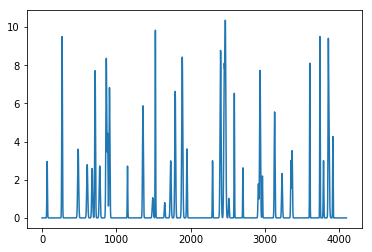

In [38]:
plt.clf()
ax = plt.gca()
ax.plot(pixx, tau_tot)
#
plt.show()

In [39]:
flux = np.exp(-tau_tot)

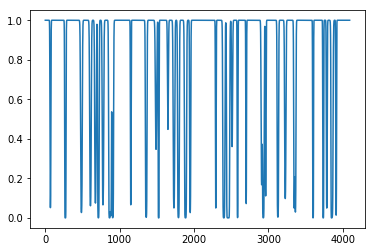

In [40]:
plt.clf()
ax = plt.gca()
ax.plot(pixx, flux)
#
plt.show()

### Cheap + wrong way to label

In [41]:
abs_pix = flux < 0.95

## Generate nsample

In [55]:
all_flux = np.zeros((npix,nsample), dtype=float)
all_lbls = np.zeros((npix,nsample), dtype=int)

In [56]:
tau_tot = np.zeros_like(pixx, dtype=float)

for kk in range(nsample):
    Nline = int(np.round(avg_Nline + np.sqrt(avg_Nline)*rstate.randn(1)))  # Should replace with Poisson?
    # Position
    randx = npix * rstate.rand(Nline)
    # Sigma
    rands = sigma[0] + (sigma[1]-sigma[0])*rstate.rand(Nline)
    # Tau0
    randt = tau0[0] + (tau0[1]-tau0[0])*rstate.rand(Nline)
    # Tau
    tau_tot[:] = 0.
    for iline in range(Nline):
        tau = randt[iline] * np.exp( -(pixx-randx[iline])**2 / 2 / rands[iline]**2 )
        tau_tot += tau
    # Save
    all_flux[:,kk] = np.exp(-tau_tot)
    all_lbls[all_flux[:,kk] < 0.95, kk] = 1

## Write

In [57]:
#np.save(resource_filename('unetabs', 'data/simple_flux.npy'), all_flux, allow_pickle=False)
np.save('/home/xavier/Projects/Unet-abs/unetabs/data/simple_flux.npy', all_flux, allow_pickle=False)
np.save('/home/xavier/Projects/Unet-abs/unetabs/data/simple_lbls.npy', all_lbls, allow_pickle=False)